# CROP PREDICTION
#### The goal of this project is to create an application that predicts a type of crop given the soil elements(Sodium(N), Potassium(K), Phosphorus(P)), temeperature and amount of rainfall

### 1. Reading the csv files and combining them

In [1]:
# Importing the necessary libraries needed

import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
import sklearn


In [2]:
# Create a list that can save all the files in the folder
files = glob.glob('stage/*')
files

['stage\\bananas.csv',
 'stage\\bean.csv',
 'stage\\cacao.csv',
 'stage\\cassava.csv',
 'stage\\chilli-pepper.csv',
 'stage\\coffee.csv',
 'stage\\fruit-tree.csv',
 'stage\\laituce.csv',
 'stage\\maize.csv',
 'stage\\okra.csv',
 'stage\\onion.csv',
 'stage\\palm-tree.csv',
 'stage\\peanut.csv',
 'stage\\pineaple.csv',
 'stage\\potato.csv',
 'stage\\rice.csv',
 'stage\\sorghum.csv',
 'stage\\sugarcane.csv',
 'stage\\tea.csv',
 'stage\\tomato.csv']

In [3]:
#create a list that holds all the dataframes read from the files list of csv
frame = []

# Append each read csv in the created list
for file in files:
    frame.append(pd.read_csv(file))
    
#Create a single dataframe by concating all the dataframes
    new = pd.concat(frame, ignore_index=True)
# new['Plant'].unique()
new.info()    
   
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736334 entries, 0 to 736333
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   736334 non-null  int64  
 1   Plant        736334 non-null  object 
 2   N            736334 non-null  int64  
 3   P            736334 non-null  int64  
 4   K            736334 non-null  int64  
 5   pH           736334 non-null  float64
 6   Rainfall     736334 non-null  float64
 7   Temperature  736334 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 44.9+ MB


In [4]:
#Dropping the first column "Unnamed: 0"
new = new.drop('Unnamed: 0', axis = 1)

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736334 entries, 0 to 736333
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Plant        736334 non-null  object 
 1   N            736334 non-null  int64  
 2   P            736334 non-null  int64  
 3   K            736334 non-null  int64  
 4   pH           736334 non-null  float64
 5   Rainfall     736334 non-null  float64
 6   Temperature  736334 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 39.3+ MB


### Exploratory Data Analysis

In [6]:
new.describe()

,N,P,K,pH,Rainfall,Temperature
count,736334.000000,736334.000000,736334.000000,736334.000000,736334.000000,736334.000000
mean,50.430366,20.004499,59.822939,5.528704,1747.613486,25.023192
std,54.297312,23.030196,56.386849,1.322511,962.855949,6.291149
min,5.000000,3.000000,10.000000,3.000000,400.000000,10.000000
25%,16.000000,10.000000,20.000000,4.800000,1126.000000,20.400000
50%,20.000000,10.000000,50.000000,5.800000,1478.700000,24.900000
75%,60.000000,30.000000,60.000000,6.800000,1979.700000,30.100000
max,250.000000,130.000000,250.000000,7.900000,4999.200000,39.300000


From the description above it can observed that the data set does not have outliers. However we shall carry out visualization to confirm our supcision

C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

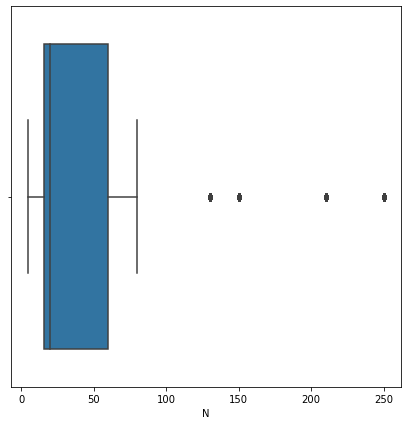

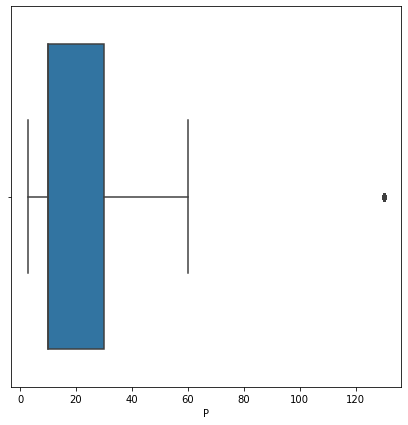

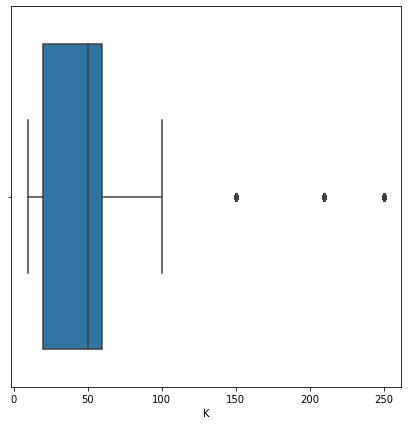

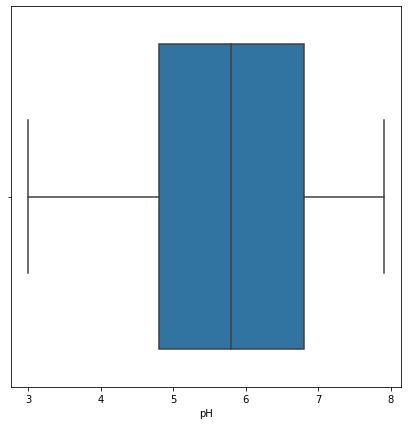

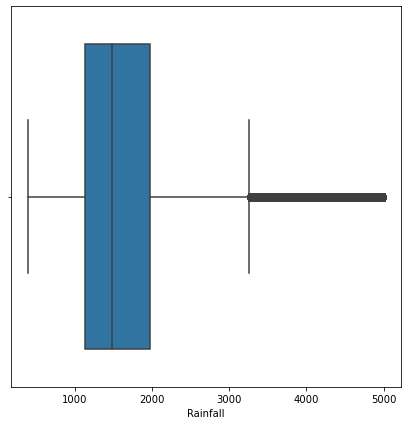

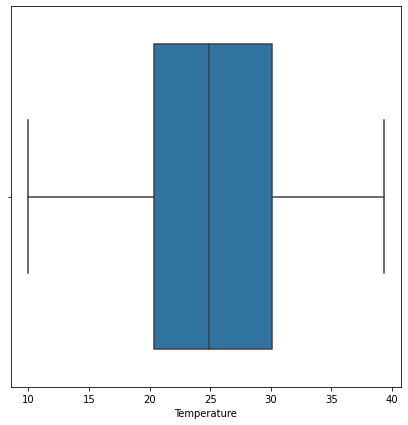

In [7]:
df1 = new.drop(columns = 'Plant', axis = 1).columns
for i in df1:
    plt.figure(figsize =(7, 7))
    sns.boxplot(new[i], orient= 'v')
    
    
    

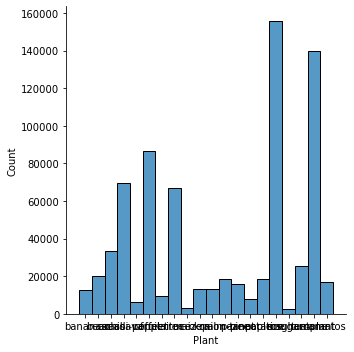

<Figure size 720x720 with 0 Axes>

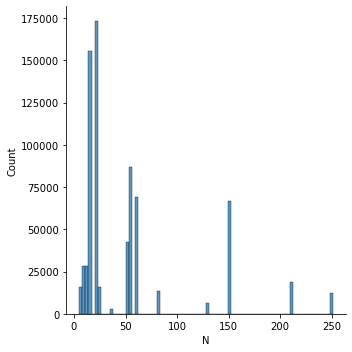

<Figure size 720x720 with 0 Axes>

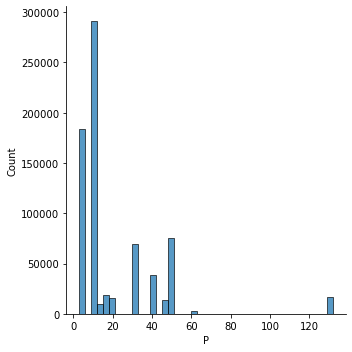

<Figure size 720x720 with 0 Axes>

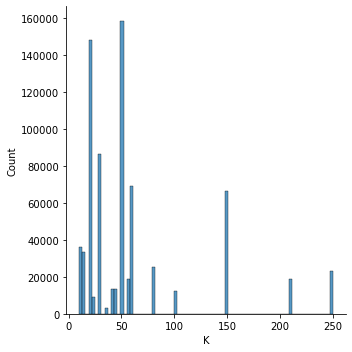

<Figure size 720x720 with 0 Axes>

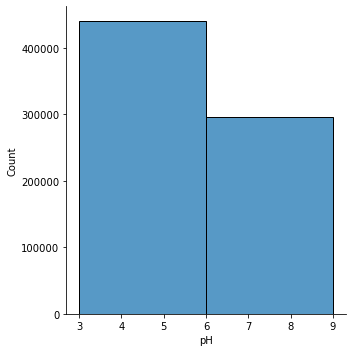

<Figure size 720x720 with 0 Axes>

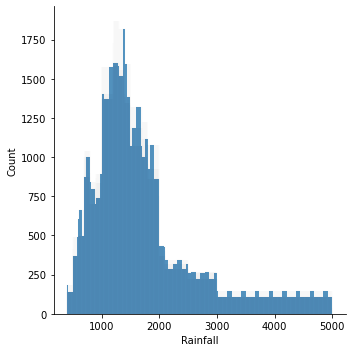

<Figure size 720x720 with 0 Axes>

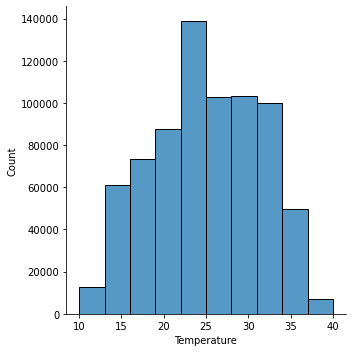

<Figure size 720x720 with 0 Axes>

In [8]:
for i in new.columns:   
    sns.displot(x=new[i], data=new, binwidth=3)
    plt.figure(figsize =(10, 10))


In [9]:
# Iterate through each column in the dataset
from scipy.stats import zscore
for column in df1:
    z_scores = zscore(new[column])  
    # Identify the outliers based on a threshold
    outliers = new[abs(z_scores) > 3] 
    print(f"Column '{column}' has {len(outliers)} outliers.\n")

Column 'N' has 12488 outliers.

Column 'P' has 17034 outliers.

Column 'K' has 23264 outliers.

Column 'pH' has 0 outliers.

Column 'Rainfall' has 14544 outliers.

Column 'Temperature' has 0 outliers.



In [10]:
print(new.skew(numeric_only=True))

N              1.933959
P              2.706678
K              1.918717
pH            -0.138905
Rainfall       1.496769
Temperature   -0.110548
dtype: float64


From the exploratory analysis done above, it can be seen that there are outliers in the dataframe. Now let us remove the outliers

### Checking for multicolinearityColinearity 

<AxesSubplot:>

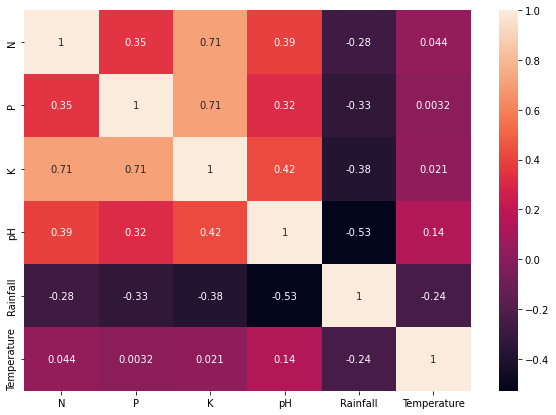

In [11]:
plt.figure(figsize =(10, 7))
sns.heatmap(new.corr(), annot= True)

### Data preprocessing

In [12]:
#scaling the data because the rainfall feature is too large as compared to the other features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = ss.fit_transform(new.drop('Plant', axis = 1))
scaled_df = pd.DataFrame(scaled_df, columns=new.drop('Plant', axis = 1).columns)
scaled_df['Plant'] = new['Plant']
scaled_df

,N,P,K,pH,Rainfall,Temperature,Plant
0,3.675500,-0.434408,0.712526,0.356365,-0.568739,-1.593222,bananas
1,3.675500,-0.434408,0.712526,0.356365,-0.568739,-1.450164,bananas
2,3.675500,-0.434408,0.712526,0.356365,-0.568739,-1.307106,bananas
3,3.675500,-0.434408,0.712526,0.356365,-0.568739,-1.164048,bananas
4,3.675500,-0.434408,0.712526,0.356365,-0.568739,-1.020989,bananas
...,...,...,...,...,...,...,...
736329,-0.007926,4.776146,3.372722,0.961275,-0.776766,0.918244,tomatos
736330,-0.007926,4.776146,3.372722,0.961275,-0.776766,1.061303,tomatos
736331,-0.007926,4.776146,3.372722,0.961275,-0.776766,1.204361,tomatos
736332,-0.007926,4.776146,3.372722,0.961275,-0.776766,1.347419,tomatos


In [13]:
print(scaled_df.skew(numeric_only=True))


N              1.933959
P              2.706678
K              1.918717
pH            -0.138905
Rainfall       1.496769
Temperature   -0.110548
dtype: float64


#### Data visualization with distplot to see the distribution and identify skewness in our data

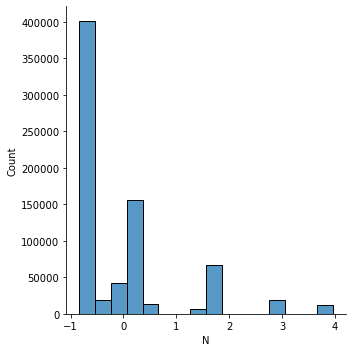

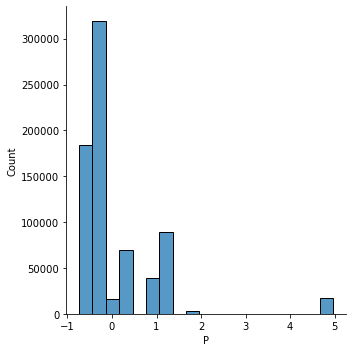

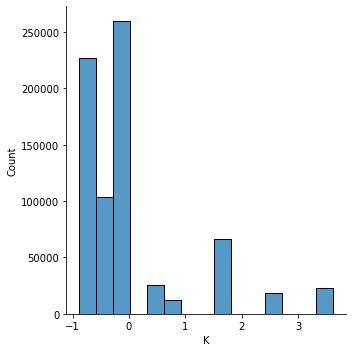

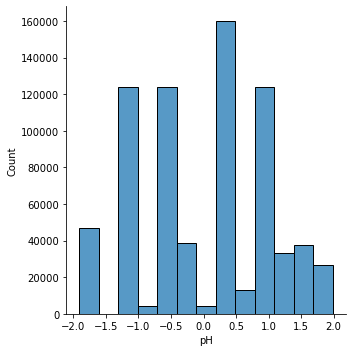

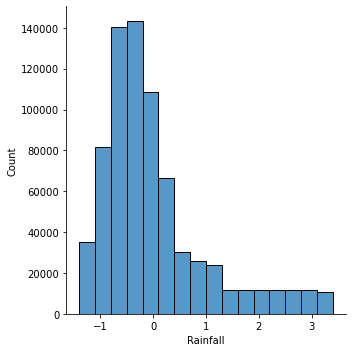

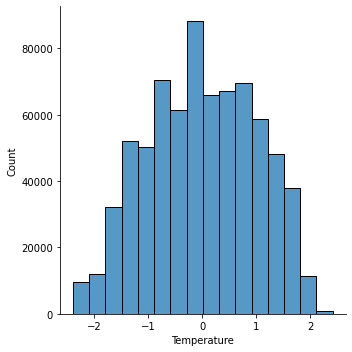

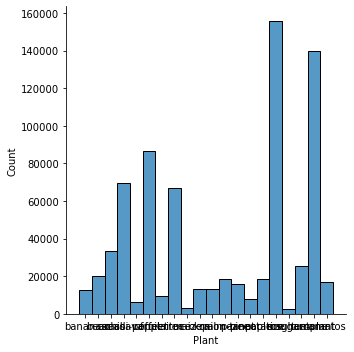

In [14]:

for i in scaled_df.columns:   
        sns.displot(x=scaled_df[i], data=scaled_df, binwidth=0.3)
        

In [15]:
# Iterate through each column in the dataset
new_df1 = scaled_df.drop(columns = 'Plant', axis = 1).columns
from scipy.stats import zscore
for column in new_df1:
    z_scores = zscore(scaled_df[column])  
    # Identify the outliers based on a threshold
    outliers = scaled_df[abs(z_scores) > 3] 
    print(f"Column '{column}' has {len(outliers)} outliers.\n")

Column 'N' has 12488 outliers.

Column 'P' has 17034 outliers.

Column 'K' has 23264 outliers.

Column 'pH' has 0 outliers.

Column 'Rainfall' has 14544 outliers.

Column 'Temperature' has 0 outliers.



In [16]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736334 entries, 0 to 736333
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   N            736334 non-null  float64
 1   P            736334 non-null  float64
 2   K            736334 non-null  float64
 3   pH           736334 non-null  float64
 4   Rainfall     736334 non-null  float64
 5   Temperature  736334 non-null  float64
 6   Plant        736334 non-null  object 
dtypes: float64(6), object(1)
memory usage: 39.3+ MB


. From the visualisation, z-score, and skweness we can see that the data has many outliers and therefore what we did to remove these outliers was to observe the points from the plots were the outliers begina nd manually remove them. 

. Another veruification is done to see if there are still outliers 

. From the heatmap we can see that the features K, N and P are highly colinear and therefore should be drop to optimise our model 


### Manually removing outliers by dropping the outliers rows

In [17]:
df_mask = scaled_df[(scaled_df['N']>1) | (scaled_df['P']>1.5) | (scaled_df['K']>2) | (scaled_df['Rainfall']>1) ]

In [18]:
new_df = scaled_df.drop(df_mask.index)

In [19]:
new_df

,N,P,K,pH,Rainfall,Temperature,Plant
12488,-0.744611,-0.694936,-0.883592,-0.399773,-1.399601,-1.593222,bean
12489,-0.744611,-0.694936,-0.883592,-0.399773,-1.399601,-1.450164,bean
12490,-0.744611,-0.694936,-0.883592,-0.399773,-1.399601,-1.307106,bean
12491,-0.744611,-0.694936,-0.883592,-0.399773,-1.399601,-1.164048,bean
12492,-0.744611,-0.694936,-0.883592,-0.399773,-1.399601,-1.020989,bean
...,...,...,...,...,...,...,...
627711,-0.560440,-0.434408,-0.706246,-0.551000,0.999098,-0.591815,tea-plant
627712,-0.560440,-0.434408,-0.706246,-0.551000,0.999098,-0.448757,tea-plant
627713,-0.560440,-0.434408,-0.706246,-0.551000,0.999098,-0.305698,tea-plant
627714,-0.560440,-0.434408,-0.706246,-0.551000,0.999098,-0.162640,tea-plant


In [20]:
# Iterate through each column in the dataset
new_df1 = new_df.drop(columns = 'Plant', axis = 1).columns
from scipy.stats import zscore
for column in new_df1:
    z_scores = zscore(new_df[column])  
    # Identify the outliers based on a threshold
    outliers = new_df[abs(z_scores) > 3] 
    print(f"Column '{column}' has {len(outliers)} outliers.\n")

Column 'N' has 0 outliers.

Column 'P' has 0 outliers.

Column 'K' has 0 outliers.

Column 'pH' has 0 outliers.

Column 'Rainfall' has 0 outliers.

Column 'Temperature' has 0 outliers.



C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vtebo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

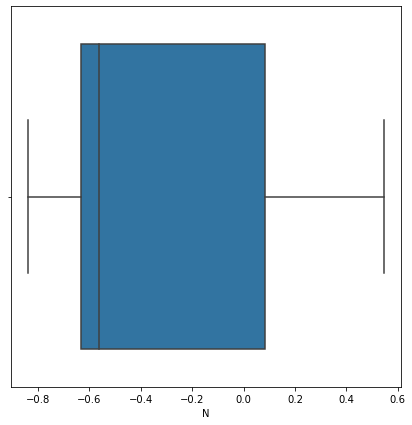

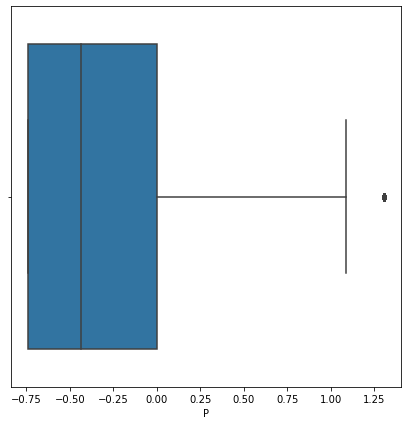

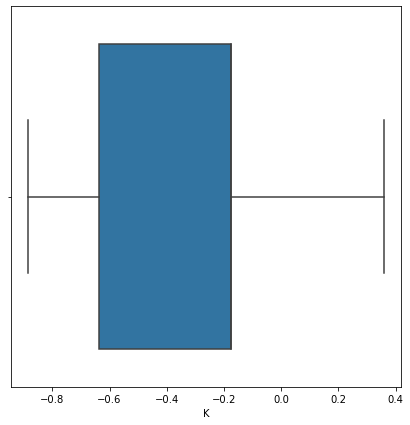

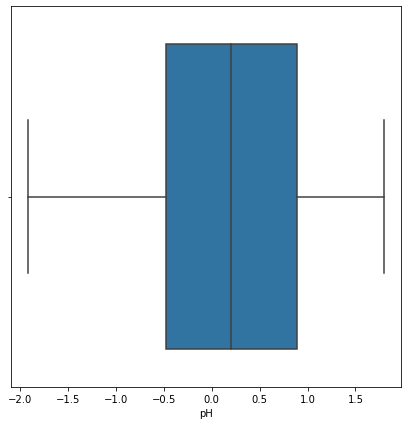

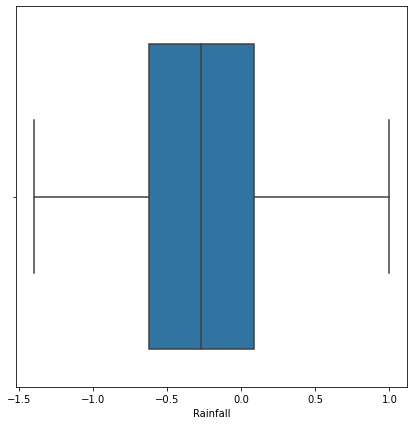

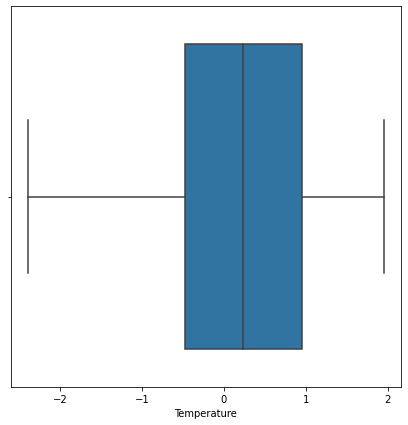

In [21]:
df1 = new_df.drop(columns = 'Plant', axis = 1).columns
for i in df1:
    plt.figure(figsize =(7, 7))
    sns.boxplot(new_df[i], orient= 'v')

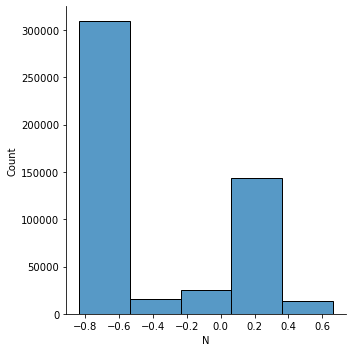

<Figure size 720x720 with 0 Axes>

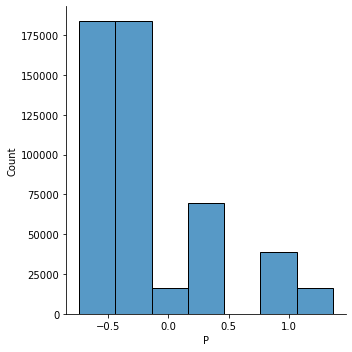

<Figure size 720x720 with 0 Axes>

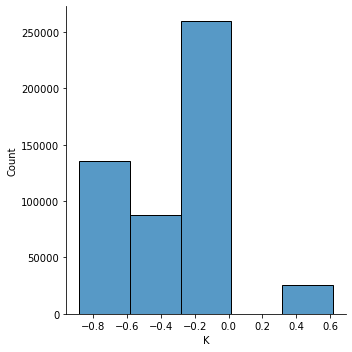

<Figure size 720x720 with 0 Axes>

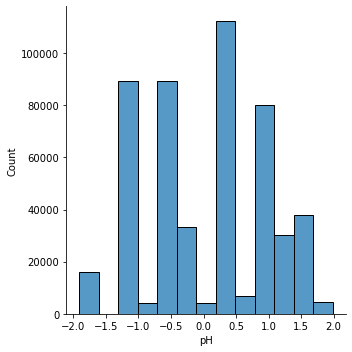

<Figure size 720x720 with 0 Axes>

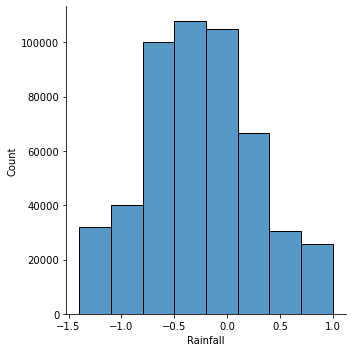

<Figure size 720x720 with 0 Axes>

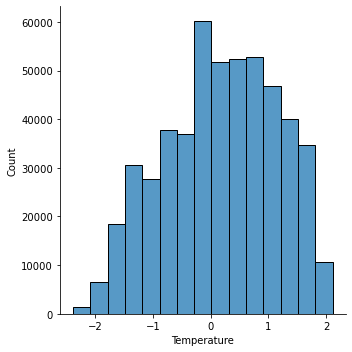

<Figure size 720x720 with 0 Axes>

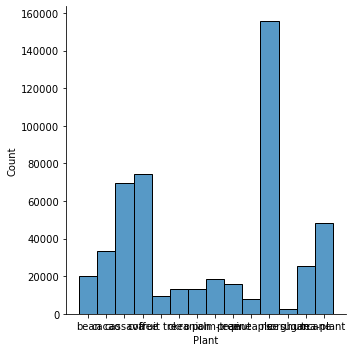

<Figure size 720x720 with 0 Axes>

In [22]:
for i in new_df.columns:   
    sns.displot(x=new_df[i], data=new_df, binwidth=0.3)
    plt.figure(figsize =(10, 10))

<AxesSubplot:>

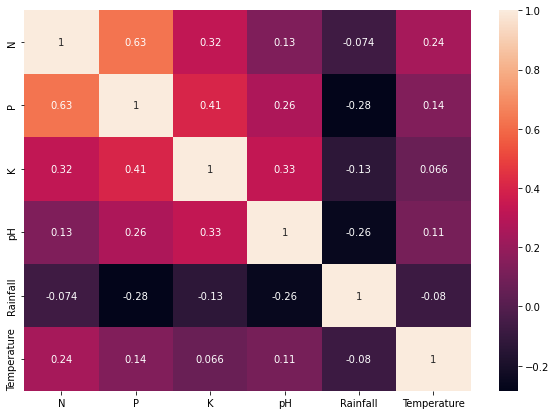

In [23]:
plt.figure(figsize =(10, 7))
sns.heatmap(new_df.corr(), annot= True)

### Train the Model

This is a classification model problem and therefore we will impliment a classifier.

In [46]:
#splitting the data into test and train
X = new_df.drop(columns = ['Plant', 'N'], axis = 1)
y = new_df['Plant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
X_test

,P,K,pH,Rainfall,Temperature
61839,-0.434408,-0.794919,0.356365,0.594779,-0.019582
186060,-0.390987,-0.528899,-0.475387,0.292865,0.266535
30795,-0.694936,-0.883592,-0.399773,-0.829422,-0.591815
364006,-0.000195,-0.883592,-1.155910,-0.738754,1.331524
22861,-0.694936,-0.883592,0.280751,-1.077123,-0.448757
...,...,...,...,...,...
311919,1.085337,-0.262880,1.036889,-0.596988,0.775186
59921,-0.434408,-0.794919,0.356365,0.505046,0.266535
90826,0.434017,0.003140,0.280751,-0.809689,1.395105
91563,0.434017,0.003140,0.961275,-0.795668,1.538163


In [48]:
X_test.corr()

,P,K,pH,Rainfall,Temperature
P,1.000000,0.407951,0.267245,-0.284336,0.133723
K,0.407951,1.000000,0.329199,-0.131519,0.065994
pH,0.267245,0.329199,1.000000,-0.258115,0.108499
Rainfall,-0.284336,-0.131519,-0.258115,1.000000,-0.079087
Temperature,0.133723,0.065994,0.108499,-0.079087,1.000000


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [51]:
y_pred = model.predict(X_test)

In [52]:
a = accuracy_score(y_test, y_pred)

In [53]:
a

1.0

In [54]:
cm = confusion_matrix(y_pred, y_test)

<AxesSubplot:>

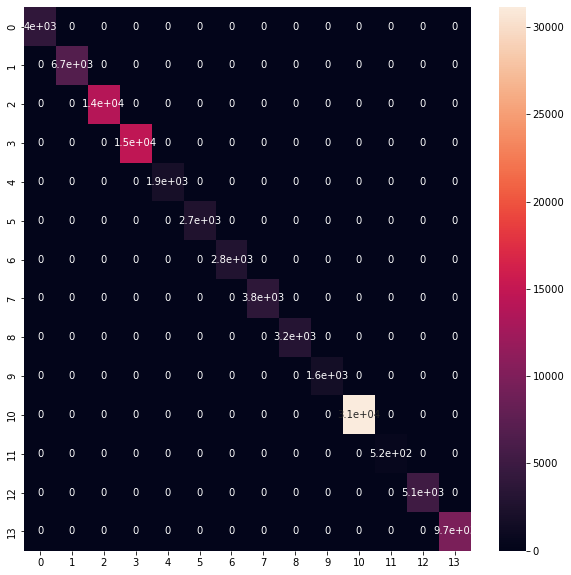

In [55]:

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True)

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [58]:
accuracy_score(pred, y_test)    

1.0

In [59]:
print(new_df.skew(numeric_only=True))


N              0.648711
P              1.052999
K             -0.021298
pH            -0.066146
Rainfall       0.160046
Temperature   -0.253100
dtype: float64


In [60]:
# Instantiate model
Gb_model = GradientBoostingClassifier(random_state=42)

# Fit model
Gb_model.fit(X_train, y_train)

# Make predictions
pred3 = Gb_model.predict(X_test)


In [61]:
accuracy_score(pred3, y_test)

1.0

In [62]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(rf, X_test, y_test,cv=10)

In [63]:
score_lr
# sv = svm.SVC()
# sv.fit(X_train, y_train)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [64]:
# pred_sv= sv.predict(X_test)

In [65]:
# accuracy_score(pred_sv, y_test)

### Deployment

In [66]:
import pickle


In [67]:
pickle.dump(rf, open('model.pkl', 'wb'))